In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import joblib
import librosa
import opensmile
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import feature_extractor as fe

## TEST SETS: Emozionalmente & RAVDESS

In [3]:
test_raw = pd.read_csv("test_set_HOLDOUT.csv")
test_raw

,file,speaker,emotion,source,split
0,EMOITA/data/1617135480050.wav,emoita_413,anger,emoita,test
1,EMOITA/data/1613586149044.wav,emoita_307,anger,emoita,test
2,EMOITA/data/1617135448748.wav,emoita_413,anger,emoita,test
3,EMOITA/data/1616505237674.wav,emoita_168,anger,emoita,test
4,EMOITA/data/1614359087222.wav,emoita_091,anger,emoita,test
...,...,...,...,...,...
1575,RAVDESS/data/speech/actor_22/03-01-06-02-02-01...,ravdess_022,fear,ravdess,test
1576,RAVDESS/data/speech/actor_22/03-01-07-02-02-02...,ravdess_022,disgust,ravdess,test
1577,RAVDESS/data/speech/actor_22/03-01-07-01-02-02...,ravdess_022,disgust,ravdess,test
1578,RAVDESS/data/speech/actor_22/03-01-05-01-02-02...,ravdess_022,anger,ravdess,test


In [4]:
emoita_raw = test_raw[test_raw["source"] == "emoita"]
ravdess_raw = test_raw[test_raw["source"] == "ravdess"]

emoita_test = emoita_raw.drop(columns=["speaker", "source", "split"])
ravdess_test = ravdess_raw.drop(columns=["speaker", "source", "split"])

In [5]:
SR = 16000
smile = opensmile.Smile(
    feature_set = opensmile.FeatureSet.eGeMAPSv02,
    feature_level = opensmile.FeatureLevel.Functionals
)

def opensmile_features(file):
    
    try:
        y, _ = librosa.load(file, sr = SR)
        
        if len(y) < 2048:
            return None
        
        features = smile.process_signal(y,SR)
        features_vector = features.reset_index(drop=True).iloc[0].to_dict()
        
        return features_vector
    except Exception as e:
        print(f"{e}")
        return None
    
def extract_opensmile_features(row):
    
    file = row["file"]
    
    full_vector = {}
    
    full_vector["file"] = file
    full_vector["label"] = row["emotion"]
    
    try:
        full_vector.update(opensmile_features(file))
        
        return full_vector
    except Exception as e:
        print(f"Extraction failed for {file}: {e}")
        return None

In [6]:
if __name__ == "__main__":
    
    features_list = list()
    
    for i, row in tqdm(emoita_test.iterrows(), total = emoita_test.shape[0]):
        
        features_vector = extract_opensmile_features(row)
        
        if features_vector is not None:
            features_list.append(features_vector)
            
    features_emoita_test = pd.DataFrame(features_list)

features_emoita_test

100%|██████████| 1228/1228 [01:00<00:00, 20.45it/s]


,file,label,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,EMOITA/data/1617135480050.wav,anger,41.724937,0.150967,35.855740,41.112427,47.496971,11.641232,857.729614,1346.343750,...,0.047744,0.019187,0.232465,2.948403,2.992519,0.149167,0.142271,0.163333,0.204097,-20.235516
1,EMOITA/data/1613586149044.wav,anger,35.535446,0.142519,32.564308,34.751892,35.699203,3.134895,66.284378,51.710617,...,0.063062,0.013510,0.096618,4.219409,3.448276,0.117500,0.076608,0.150000,0.105475,-23.867023
2,EMOITA/data/1617135448748.wav,anger,39.703667,0.136284,34.934837,39.161217,45.677605,10.742767,96.546173,43.338196,...,0.051960,0.011979,0.587906,3.769402,2.690583,0.128333,0.077549,0.221667,0.121781,-17.737782
3,EMOITA/data/1616505237674.wav,anger,31.334511,0.157851,28.120642,31.863312,33.560150,5.439508,134.899719,153.205444,...,0.053100,-0.005604,0.467035,4.712042,4.301075,0.137500,0.108022,0.084286,0.036589,-15.472822
4,EMOITA/data/1614359087222.wav,anger,35.625938,0.094227,32.297398,35.650177,38.536732,6.239334,38.881409,14.815413,...,0.054274,0.012551,0.016397,2.570694,0.783290,0.743333,0.181904,0.506667,0.423976,-24.373337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,EMOITA/data/1614266389200.wav,surprise,38.079361,0.116583,33.754681,36.596432,43.478603,9.723923,47.648502,12.071954,...,0.049136,0.009262,0.317500,4.240283,2.166065,0.221667,0.084344,0.216667,0.299926,-16.911533
1224,EMOITA/data/1613821821107.wav,surprise,34.254425,0.118229,30.726734,32.946819,37.181587,6.454853,40.745735,17.738010,...,0.053469,0.004696,0.056983,3.468208,2.052786,0.232857,0.191514,0.203750,0.229779,-21.862700
1225,EMOITA/data/1614196499838.wav,surprise,28.901733,0.284610,22.057489,26.310957,36.434444,14.376955,686.014709,1237.272705,...,0.067665,0.017545,0.404408,4.249292,3.448276,0.118333,0.130309,0.161818,0.153908,-20.936182
1226,EMOITA/data/1613061195435.wav,surprise,34.250805,0.087972,30.173735,34.587254,36.777252,6.603518,16.658382,14.790795,...,0.053853,0.021053,0.009401,3.194888,0.974026,0.416667,0.260811,0.583333,0.412499,-26.775084


In [7]:
if __name__ == "__main__":
    
    features_list = list()
    
    for i, row in tqdm(ravdess_test.iterrows(), total = ravdess_test.shape[0]):
        
        features_vector = extract_opensmile_features(row)
        
        if features_vector is not None:
            features_list.append(features_vector)
            
    features_ravdess_test = pd.DataFrame(features_list)

features_ravdess_test

100%|██████████| 352/352 [00:20<00:00, 17.18it/s]


,file,label,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,RAVDESS/data/songs/actor_24/03-02-03-02-02-02-...,happiness,45.101471,0.039531,43.904579,44.277122,47.326218,3.421638,22.742720,29.225136,...,0.041985,0.029971,0.003434,2.145923,1.084599,0.458000,0.274620,0.440000,0.470191,-33.433365
1,RAVDESS/data/songs/actor_24/03-02-06-02-01-01-...,fear,44.528454,0.046336,43.303604,44.369308,46.573116,3.269512,134.244034,186.876892,...,0.059931,0.022651,0.016233,2.212389,1.342282,0.311667,0.141588,0.352857,0.458529,-31.852385
2,RAVDESS/data/songs/actor_24/03-02-03-01-02-01-...,happiness,44.851120,0.036829,43.759659,44.260323,45.319454,1.559795,32.955421,27.467478,...,0.044512,0.028768,0.008173,1.643193,1.187648,0.388000,0.232069,0.360000,0.435890,-33.484673
3,RAVDESS/data/songs/actor_24/03-02-06-01-01-02-...,fear,45.104588,0.035952,43.656654,44.428879,47.168831,3.512177,28.351553,19.341887,...,0.049548,0.027176,0.003482,2.087683,1.054852,0.418000,0.326153,0.423333,0.441575,-39.375267
4,RAVDESS/data/songs/actor_24/03-02-06-02-02-01-...,fear,44.645962,0.038735,43.333717,44.521980,46.058876,2.725159,51.359375,46.749329,...,0.050468,0.031045,0.024316,2.606635,1.438849,0.290000,0.198242,0.328571,0.408392,-31.682528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,RAVDESS/data/speech/actor_22/03-01-06-02-02-01...,fear,41.672489,0.035853,41.022678,41.788143,42.839661,1.816982,58.537964,28.007555,...,0.044521,0.025301,0.020601,1.912568,1.385042,0.240000,0.113666,0.383333,0.451873,-30.959707
348,RAVDESS/data/speech/actor_22/03-01-07-02-02-02...,disgust,34.735092,0.069655,32.945992,35.010628,36.545666,3.599674,52.691261,52.955345,...,0.030776,0.027249,0.010376,2.444988,1.237624,0.314000,0.155897,0.393333,0.418078,-36.724762
349,RAVDESS/data/speech/actor_22/03-01-07-01-02-02...,disgust,32.729259,0.051522,31.521660,32.308281,33.993881,2.472221,34.743587,44.237080,...,0.026691,0.030473,0.004454,1.570681,1.591512,0.226667,0.125122,0.378333,0.430481,-40.272083
350,RAVDESS/data/speech/actor_22/03-01-05-01-02-02...,anger,34.429550,0.089172,32.117527,33.638233,37.335365,5.217838,54.006351,65.455711,...,0.028490,0.030152,0.006293,1.741294,1.259446,0.296000,0.155512,0.396667,0.409661,-36.524685


In [8]:
SVM = joblib.load("TRAINING_ML/SVM_OpenSMILE.pkl")
print(SVM)
print(SVM["label_enc"].classes_)

model = SVM["model"]
scaler = SVM["scaler"]
le = SVM["label_enc"]

{'model': SVC(C=10, class_weight='balanced', gamma=0.01), 'scaler': StandardScaler(), 'label_enc': LabelEncoder(), 'feature_set': 'OpenSMILE_eGeMAPSv02'}
['anger' 'disgust' 'fear' 'happiness' 'neutral' 'sadness' 'surprise']


In [9]:
def build_test_files(df):
    try:
        
        df["enc_label"] = le.trasform(df["label"])
        
        X_test_raw = df.drop(columns = ["file", "label"])
        y_test = df.enc_label
        
        X_test = scaler.transform(X_test_raw)
        
        return X_test, y_test
    
    except Exception as e:
        print(f"{e}")
        return None    


### Emozionalmente

In [10]:
features_emoita_test

,file,label,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,EMOITA/data/1617135480050.wav,anger,41.724937,0.150967,35.855740,41.112427,47.496971,11.641232,857.729614,1346.343750,...,0.047744,0.019187,0.232465,2.948403,2.992519,0.149167,0.142271,0.163333,0.204097,-20.235516
1,EMOITA/data/1613586149044.wav,anger,35.535446,0.142519,32.564308,34.751892,35.699203,3.134895,66.284378,51.710617,...,0.063062,0.013510,0.096618,4.219409,3.448276,0.117500,0.076608,0.150000,0.105475,-23.867023
2,EMOITA/data/1617135448748.wav,anger,39.703667,0.136284,34.934837,39.161217,45.677605,10.742767,96.546173,43.338196,...,0.051960,0.011979,0.587906,3.769402,2.690583,0.128333,0.077549,0.221667,0.121781,-17.737782
3,EMOITA/data/1616505237674.wav,anger,31.334511,0.157851,28.120642,31.863312,33.560150,5.439508,134.899719,153.205444,...,0.053100,-0.005604,0.467035,4.712042,4.301075,0.137500,0.108022,0.084286,0.036589,-15.472822
4,EMOITA/data/1614359087222.wav,anger,35.625938,0.094227,32.297398,35.650177,38.536732,6.239334,38.881409,14.815413,...,0.054274,0.012551,0.016397,2.570694,0.783290,0.743333,0.181904,0.506667,0.423976,-24.373337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,EMOITA/data/1614266389200.wav,surprise,38.079361,0.116583,33.754681,36.596432,43.478603,9.723923,47.648502,12.071954,...,0.049136,0.009262,0.317500,4.240283,2.166065,0.221667,0.084344,0.216667,0.299926,-16.911533
1224,EMOITA/data/1613821821107.wav,surprise,34.254425,0.118229,30.726734,32.946819,37.181587,6.454853,40.745735,17.738010,...,0.053469,0.004696,0.056983,3.468208,2.052786,0.232857,0.191514,0.203750,0.229779,-21.862700
1225,EMOITA/data/1614196499838.wav,surprise,28.901733,0.284610,22.057489,26.310957,36.434444,14.376955,686.014709,1237.272705,...,0.067665,0.017545,0.404408,4.249292,3.448276,0.118333,0.130309,0.161818,0.153908,-20.936182
1226,EMOITA/data/1613061195435.wav,surprise,34.250805,0.087972,30.173735,34.587254,36.777252,6.603518,16.658382,14.790795,...,0.053853,0.021053,0.009401,3.194888,0.974026,0.416667,0.260811,0.583333,0.412499,-26.775084


In [12]:
X_raw = features_emoita_test.drop(columns = ["file", "label"])
X_vec = scaler.transform(X_raw)
X_test = pd.DataFrame(X_vec, columns=X_raw.columns)
X_test

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,1.171692,0.788463,0.554322,1.071602,1.568563,1.865282,4.157666,7.140257,0.546925,0.782693,...,0.684703,0.279278,0.822574,0.001830,1.308614,-0.776523,-0.503539,-0.570444,-0.025470,0.738159
1,0.002162,0.647984,-0.064241,-0.087071,-0.388367,-0.573194,-0.253096,-0.263584,1.080046,1.176748,...,1.078449,-0.159732,-0.105860,1.284351,1.834109,-0.881279,-0.953310,-0.671805,-0.620362,0.316202
2,0.789765,0.544303,0.381256,0.716158,1.266780,1.607723,-0.084446,-0.311465,0.177253,-0.075264,...,0.793066,-0.278154,3.251808,0.830266,0.960478,-0.845441,-0.946861,-0.126988,-0.522006,1.028379
3,-0.791623,0.902922,-0.899345,-0.613272,-0.743178,0.087460,0.129301,0.316852,-0.252811,-0.278087,...,0.822371,-1.637907,2.425729,1.781446,2.817399,-0.815117,-0.738132,-1.171371,-1.035886,1.291553
4,0.019261,-0.154996,-0.114402,0.076566,0.082302,0.316743,-0.405814,-0.474583,-0.209598,-0.299666,...,0.852561,-0.233904,-0.654118,-0.379301,-1.238659,1.189036,-0.232067,2.039610,1.300853,0.257372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0.482845,0.216722,0.159467,0.248941,0.902025,1.315655,-0.356955,-0.490272,-0.003942,-0.338092,...,0.720468,-0.488258,1.403743,1.305414,0.355701,-0.536686,-0.900320,-0.164999,0.552576,1.124384
1224,-0.239893,0.244097,-0.409579,-0.415894,-0.142480,0.378525,-0.395424,-0.457869,-0.193875,-0.095143,...,0.831863,-0.841357,-0.376736,0.526344,0.225088,-0.499667,-0.166240,-0.263192,0.129447,0.549091
1225,-1.251307,3.010633,-2.038802,-1.624723,-0.266410,2.649521,3.200690,6.516494,1.587511,1.243834,...,1.196766,0.152276,1.997707,1.314504,1.834108,-0.878522,-0.585470,-0.581962,-0.328214,0.656746
1226,-0.240577,-0.259000,-0.513505,-0.117063,-0.209548,0.421142,-0.529664,-0.474724,-0.281491,-0.278880,...,0.841730,0.423587,-0.701937,0.250548,-1.018738,0.108392,0.308422,2.622437,1.231625,-0.021695


In [13]:
y_test = le.transform(features_emoita_test["label"])
y_test

array([0, 0, 0, ..., 6, 6, 6], shape=(1228,))

In [14]:
y_pred = model.predict(X_test)


REPORT:
Accuracy: 42.59%
UAR (Macro Recall): 0.4284
              precision    recall  f1-score   support

       anger       0.40      0.38      0.39       185
     disgust       0.44      0.54      0.49       181
        fear       0.45      0.37      0.40       191
   happiness       0.42      0.55      0.47       161
     neutral       0.44      0.53      0.48       165
     sadness       0.42      0.31      0.36       180
    surprise       0.40      0.33      0.36       165

    accuracy                           0.43      1228
   macro avg       0.42      0.43      0.42      1228
weighted avg       0.43      0.43      0.42      1228



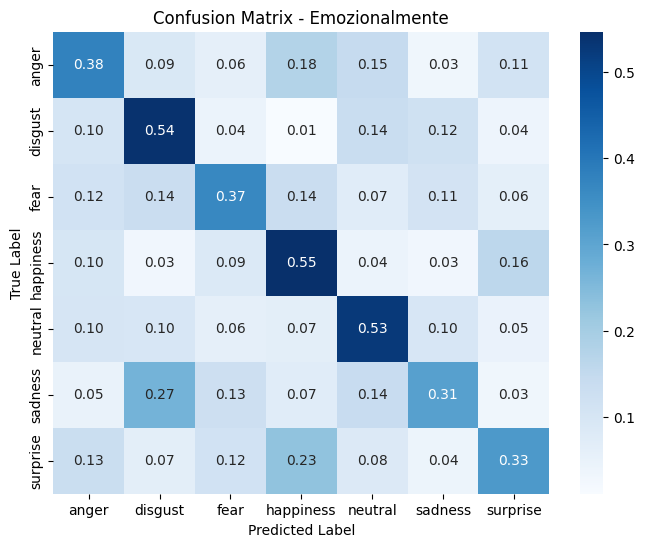

In [15]:
print(f"\n{'='*30}")
print("REPORT:")
print(f"{'='*30}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"UAR (Macro Recall): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ---- CONFUSION MATRIX ---- #
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Emozionalmente')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### RAVDESS

In [16]:
features_ravdess_test

,file,label,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,RAVDESS/data/songs/actor_24/03-02-03-02-02-02-...,happiness,45.101471,0.039531,43.904579,44.277122,47.326218,3.421638,22.742720,29.225136,...,0.041985,0.029971,0.003434,2.145923,1.084599,0.458000,0.274620,0.440000,0.470191,-33.433365
1,RAVDESS/data/songs/actor_24/03-02-06-02-01-01-...,fear,44.528454,0.046336,43.303604,44.369308,46.573116,3.269512,134.244034,186.876892,...,0.059931,0.022651,0.016233,2.212389,1.342282,0.311667,0.141588,0.352857,0.458529,-31.852385
2,RAVDESS/data/songs/actor_24/03-02-03-01-02-01-...,happiness,44.851120,0.036829,43.759659,44.260323,45.319454,1.559795,32.955421,27.467478,...,0.044512,0.028768,0.008173,1.643193,1.187648,0.388000,0.232069,0.360000,0.435890,-33.484673
3,RAVDESS/data/songs/actor_24/03-02-06-01-01-02-...,fear,45.104588,0.035952,43.656654,44.428879,47.168831,3.512177,28.351553,19.341887,...,0.049548,0.027176,0.003482,2.087683,1.054852,0.418000,0.326153,0.423333,0.441575,-39.375267
4,RAVDESS/data/songs/actor_24/03-02-06-02-02-01-...,fear,44.645962,0.038735,43.333717,44.521980,46.058876,2.725159,51.359375,46.749329,...,0.050468,0.031045,0.024316,2.606635,1.438849,0.290000,0.198242,0.328571,0.408392,-31.682528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,RAVDESS/data/speech/actor_22/03-01-06-02-02-01...,fear,41.672489,0.035853,41.022678,41.788143,42.839661,1.816982,58.537964,28.007555,...,0.044521,0.025301,0.020601,1.912568,1.385042,0.240000,0.113666,0.383333,0.451873,-30.959707
348,RAVDESS/data/speech/actor_22/03-01-07-02-02-02...,disgust,34.735092,0.069655,32.945992,35.010628,36.545666,3.599674,52.691261,52.955345,...,0.030776,0.027249,0.010376,2.444988,1.237624,0.314000,0.155897,0.393333,0.418078,-36.724762
349,RAVDESS/data/speech/actor_22/03-01-07-01-02-02...,disgust,32.729259,0.051522,31.521660,32.308281,33.993881,2.472221,34.743587,44.237080,...,0.026691,0.030473,0.004454,1.570681,1.591512,0.226667,0.125122,0.378333,0.430481,-40.272083
350,RAVDESS/data/speech/actor_22/03-01-05-01-02-02...,anger,34.429550,0.089172,32.117527,33.638233,37.335365,5.217838,54.006351,65.455711,...,0.028490,0.030152,0.006293,1.741294,1.259446,0.296000,0.155512,0.396667,0.409661,-36.524685


In [17]:
X_raw = features_ravdess_test.drop(columns = ["file", "label"])
X_vec = scaler.transform(X_raw)
X_test = pd.DataFrame(X_vec, columns=X_raw.columns)
X_test

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,1.809703,-1.064472,2.066951,1.648103,1.540240,-0.490995,-0.495756,-0.392175,-0.432193,-0.428648,...,0.536674,1.113253,-0.742713,-0.807920,-0.891246,0.245127,0.403010,1.532803,1.579628,-0.795343
1,1.701429,-0.951315,1.954009,1.664896,1.415321,-0.534604,0.125646,0.509415,-0.308688,-0.291072,...,0.997953,0.547179,-0.655242,-0.740852,-0.594133,-0.238958,-0.508214,0.870335,1.509280,-0.611644
2,1.762398,-1.109394,2.039716,1.645042,1.207372,-1.024721,-0.438840,-0.402227,-0.420589,-0.386988,...,0.601613,1.020187,-0.710324,-1.315205,-0.772428,0.013560,0.111550,0.924635,1.372719,-0.801305
3,1.810292,-1.123991,2.020358,1.675747,1.514134,-0.465040,-0.464497,-0.448697,-0.420064,-0.439570,...,0.731059,0.897069,-0.742387,-0.866688,-0.925544,0.112803,0.755999,1.406102,1.407015,-1.485753
4,1.723633,-1.077715,1.959668,1.692707,1.330022,-0.690652,-0.336274,-0.291957,-0.241414,-0.309500,...,0.754714,1.196238,-0.599996,-0.343034,-0.482790,-0.310633,-0.120152,0.685713,1.206848,-0.591908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1.161782,-1.125632,1.525352,1.194695,0.796041,-0.950995,-0.296267,-0.399139,-0.236403,-0.321894,...,0.601846,0.752082,-0.625391,-1.043389,-0.544831,-0.476038,-0.699472,1.102018,1.469128,-0.507921
348,-0.149069,-0.563579,0.007489,-0.039938,-0.247962,-0.439958,-0.328851,-0.256465,-0.383746,-0.364393,...,0.248547,0.902694,-0.695267,-0.506146,-0.714806,-0.231239,-0.410201,1.178039,1.265274,-1.177782
349,-0.528079,-0.865097,-0.260187,-0.532214,-0.671234,-0.763160,-0.428874,-0.306324,-0.200114,-0.289481,...,0.143552,1.152062,-0.735741,-1.388374,-0.306767,-0.520145,-0.621002,1.064007,1.340092,-1.589957
350,-0.206802,-0.239059,-0.148205,-0.289942,-0.116972,0.023915,-0.321522,-0.184977,-0.257775,-0.311565,...,0.189790,1.127234,-0.723173,-1.216215,-0.689645,-0.290784,-0.412840,1.203379,1.214505,-1.154534


In [18]:
y_test = le.transform(features_ravdess_test["label"])
y_test

array([3, 2, 3, 2, 2, 0, 5, 4, 0, 5, 0, 3, 5, 2, 5, 5, 3, 3, 2, 0, 0, 0,
       4, 0, 5, 4, 5, 2, 2, 3, 3, 3, 0, 5, 2, 4, 0, 5, 3, 0, 2, 3, 2, 0,
       2, 2, 0, 4, 2, 4, 2, 5, 2, 5, 0, 5, 2, 3, 5, 3, 3, 3, 3, 5, 4, 4,
       3, 5, 5, 0, 0, 0, 5, 5, 3, 0, 2, 0, 4, 3, 3, 5, 2, 5, 3, 0, 0, 2,
       0, 2, 3, 5, 2, 2, 2, 2, 3, 3, 4, 5, 0, 0, 5, 4, 4, 5, 0, 3, 4, 3,
       2, 3, 3, 5, 0, 4, 2, 3, 4, 3, 2, 5, 3, 3, 5, 0, 4, 0, 0, 5, 5, 3,
       0, 2, 2, 2, 5, 2, 0, 5, 5, 0, 2, 0, 5, 2, 0, 2, 5, 0, 5, 1, 0, 3,
       3, 0, 6, 6, 4, 0, 2, 5, 5, 3, 0, 1, 1, 1, 6, 6, 2, 3, 0, 6, 1, 1,
       4, 1, 6, 4, 4, 5, 2, 2, 0, 3, 5, 2, 3, 6, 2, 5, 1, 3, 3, 6, 3, 2,
       6, 2, 0, 0, 1, 0, 5, 0, 1, 3, 6, 3, 1, 2, 2, 2, 6, 5, 6, 4, 5, 2,
       3, 6, 1, 3, 0, 1, 6, 5, 5, 4, 6, 0, 3, 3, 2, 2, 0, 1, 5, 1, 0, 5,
       6, 5, 1, 4, 3, 4, 6, 5, 3, 2, 6, 0, 0, 6, 0, 0, 1, 3, 6, 3, 0, 5,
       1, 2, 2, 3, 1, 0, 0, 4, 3, 2, 3, 1, 6, 2, 1, 6, 3, 6, 2, 3, 1, 1,
       1, 5, 5, 5, 5, 4, 2, 5, 2, 4, 5, 4, 0, 6, 6,

In [19]:
y_pred = model.predict(X_test)


REPORT:
Accuracy: 52.27%
UAR (Macro Recall): 0.5134
              precision    recall  f1-score   support

       anger       0.66      0.58      0.62        64
     disgust       0.40      0.38      0.39        32
        fear       0.56      0.45      0.50        64
   happiness       0.45      0.42      0.44        64
     neutral       0.33      0.41      0.36        32
     sadness       0.54      0.70      0.61        64
    surprise       0.70      0.66      0.68        32

    accuracy                           0.52       352
   macro avg       0.52      0.51      0.51       352
weighted avg       0.53      0.52      0.52       352



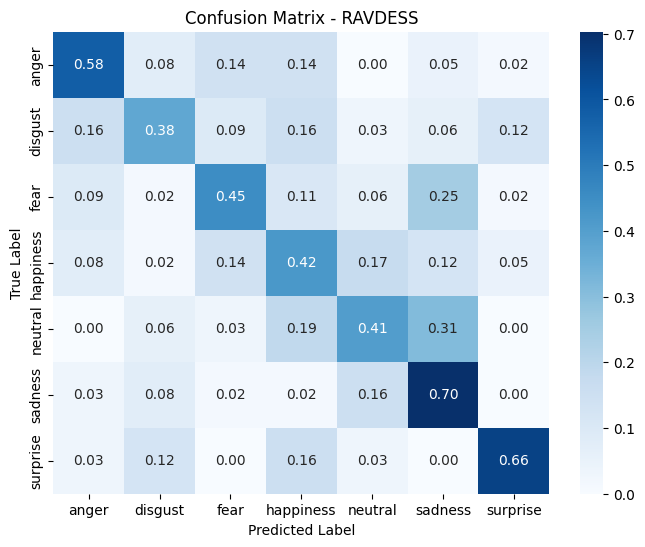

In [20]:
print(f"\n{'='*30}")
print("REPORT:")
print(f"{'='*30}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"UAR (Macro Recall): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ---- CONFUSION MATRIX ---- #
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - RAVDESS')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()